In [10]:
!pip install -q kaggle

!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

!kaggle datasets download -d rohanrao/nifty50-stock-market-data
!unzip -q nifty50-stock-market-data.zip -d stock_data


Dataset URL: https://www.kaggle.com/datasets/rohanrao/nifty50-stock-market-data
License(s): CC0-1.0


In [14]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import SimpleRNN, Dense
import matplotlib.pyplot as plt

In [15]:
df = pd.read_csv('stock_data/TCS.csv', parse_dates=['Date'], index_col='Date')
df = df[['Close']].dropna()

scaler = MinMaxScaler()
df['Close'] = scaler.fit_transform(df['Close'].values.reshape(-1, 1))

def create_sequences(data, seq_length):
    xs, ys = [], []
    for i in range(len(data) - seq_length - 1):
        xs.append(data[i:i+seq_length])
        ys.append(data[i+seq_length])
    return np.array(xs), np.array(ys)

seq_len = 10
X, y = create_sequences(df['Close'].values, seq_len)

train_size = int(len(X) * 0.8)
X_train, y_train = X[:train_size], y[:train_size]
X_test, y_test = X[train_size:], y[train_size:]

X_train = X_train.reshape((X_train.shape[0], X_train.shape[1], 1))
X_test = X_test.reshape((X_test.shape[0], X_test.shape[1], 1))


In [16]:
from tensorflow.keras.optimizers import SGD

model = Sequential([
    SimpleRNN(32, input_shape=(seq_len, 1)),
    Dense(1)
])

model.compile(loss='mse', optimizer=SGD(learning_rate=0.01), metrics=['mse'])

history = model.fit(
    X_train, y_train,
    epochs=20,
    batch_size=32,
    validation_split=0.2,
    verbose=2
)


Epoch 1/20


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


83/83 - 3s - 30ms/step - loss: 0.0035 - mse: 0.0035 - val_loss: 0.0022 - val_mse: 0.0022
Epoch 2/20
83/83 - 0s - 5ms/step - loss: 0.0010 - mse: 0.0010 - val_loss: 0.0030 - val_mse: 0.0030
Epoch 3/20
83/83 - 1s - 9ms/step - loss: 7.7937e-04 - mse: 7.7937e-04 - val_loss: 0.0015 - val_mse: 0.0015
Epoch 4/20
83/83 - 1s - 6ms/step - loss: 6.2611e-04 - mse: 6.2611e-04 - val_loss: 0.0011 - val_mse: 0.0011
Epoch 5/20
83/83 - 0s - 5ms/step - loss: 5.3134e-04 - mse: 5.3134e-04 - val_loss: 6.3838e-04 - val_mse: 6.3838e-04
Epoch 6/20
83/83 - 1s - 7ms/step - loss: 4.7218e-04 - mse: 4.7218e-04 - val_loss: 4.2936e-04 - val_mse: 4.2936e-04
Epoch 7/20
83/83 - 0s - 4ms/step - loss: 4.3361e-04 - mse: 4.3361e-04 - val_loss: 5.8550e-04 - val_mse: 5.8550e-04
Epoch 8/20
83/83 - 1s - 8ms/step - loss: 4.1130e-04 - mse: 4.1130e-04 - val_loss: 4.3522e-04 - val_mse: 4.3522e-04
Epoch 9/20
83/83 - 0s - 5ms/step - loss: 3.9683e-04 - mse: 3.9683e-04 - val_loss: 4.3295e-04 - val_mse: 4.3295e-04
Epoch 10/20
83/83 - 1s 

26/26 ━━━━━━━━━━━━━━━━━━━━ 2s 24ms/step


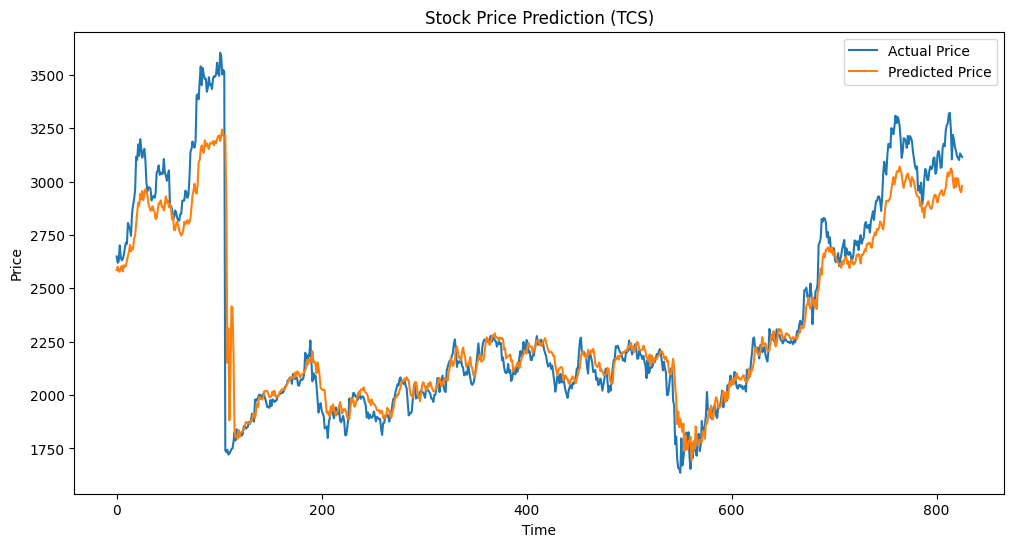

In [ ]:
y_pred = model.predict(X_test)
y_pred = scaler.inverse_transform(y_pred)
y_actual = scaler.inverse_transform(y_test.reshape(-1, 1))

plt.figure(figsize=(12, 6))
plt.plot(y_actual, label='Actual Price')
plt.plot(y_pred, label='Predicted Price')
plt.title("Stock Price Prediction (TCS)")
plt.xlabel("Time")
plt.ylabel("Price")
plt.legend()
plt.show()